In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/benchmarking-gnns/data/LogicalPlan')

In [3]:
!pip install dgl-cu101
!pip install ogb

In [4]:
import numpy as np
import torch
import pickle
import time
import os
import matplotlib.pyplot as plt

In [5]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())

/content/drive/MyDrive/benchmarking-gnns


In [6]:
import pickle
from data.physical_plan import PhysicalPlanDatasetDGL
from data.physical_plan import PhysicalPlanDataset
from data.data import LoadData
from torch.utils.data import DataLoader

Using backend: pytorch


In [7]:
DATASET_NAME = "PhysicalPlanTime"
dataset = PhysicalPlanDatasetDGL(DATASET_NAME)

Loading Dataset PhysicalPlanTime
preparing graphs for the TRAIN set...
preparing graphs for the VAL set...
preparing graphs for the TEST set...
Time taken: 13.2410s


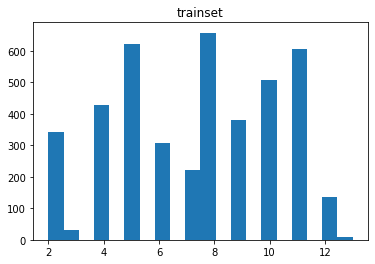

min/max : 2 13


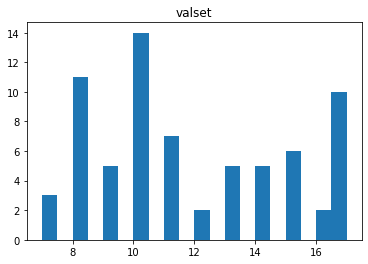

min/max : 7 17


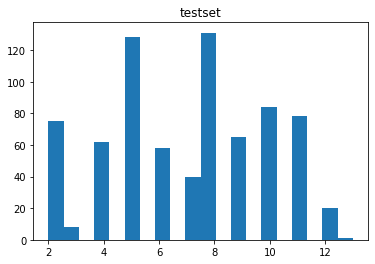

min/max : 2 13


In [8]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('min/max :', graph_sizes.min().long().item(), graph_sizes.max().long().item())


plot_histo_graphs(dataset.train, 'trainset')
plot_histo_graphs(dataset.val, 'valset')
plot_histo_graphs(dataset.test, 'testset')

In [9]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])

4250
70
750
(Graph(num_nodes=4, num_edges=3,
      ndata_schemes={'feat': Scheme(shape=(263,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float32)}), tensor(0.8461))
(Graph(num_nodes=9, num_edges=8,
      ndata_schemes={'feat': Scheme(shape=(263,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float32)}), tensor(0.4946))
(Graph(num_nodes=11, num_edges=10,
      ndata_schemes={'feat': Scheme(shape=(263,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float32)}), tensor(0.3675))


In [10]:
num_atom_type = 136   #irrelevant
num_bond_type = 3   #irrelevant

In [11]:
start = time.time()
with open('data/PhysicalPlan/PhysicalPlanTime.pkl', 'wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test,num_atom_type,num_bond_type],f)
print('Time (sec):',time.time() - start)

Time (sec): 2.578268051147461


In [12]:
DATASET_NAME = 'PhysicalPlanTime'
dataset = LoadData(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test

[I] Loading dataset PhysicalPlanTime...
train, test, val sizes : 4250 750 70
[I] Finished loading.
[I] Data load time: 3.0817s


In [13]:
batch_size = 10
collate = PhysicalPlanDataset.collate
print(PhysicalPlanDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)

data.physical_plan.PhysicalPlanDataset


In [14]:
dataset._add_self_loops()
dataset._add_positional_encodings(8)

/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)
/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: DGLGraph.adjacency_matrix_scipy is deprecated. Please replace it with:

	DGLGraph.adjacency_matrix(transpose, scipy_fmt="csr").

  return warnings.warn(message, category=category, stacklevel=1)
